In [1]:
import pandas as pd
import numpy as np

In [2]:
air_quality = pd.read_csv('../data/processed/air-quality_interpolated.csv')

# Set date as index
air_quality.set_index('date', inplace=True)

In [3]:
air_quality

,station,SO_2,CO,NO,NO_2,PM25,PM10,NOx,O_3,TOL,...,average_temperature,rainfall,minimum_temperature,maximum_temperature,wind_direction,average_wind_speed,maximum_wind_speed,maximum_ultraviolet_index,maximum_pressure,minimum_pressure
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,28079004,17.0,0.8,45.0,58.0,NaN,NaN,127.0,NaN,NaN,...,8.3,4.6,5.7,10.8,23.7,1.4,12.1,0.0,937.9,930.1
2001-01-01,28079008,11.0,1.0,59.0,53.0,NaN,20.0,143.0,21.0,10.2,...,8.2,5.2,5.6,10.7,23.0,2.2,11.7,0.0,937.9,930.1
2001-01-01,28079011,NaN,NaN,46.0,45.0,NaN,NaN,115.0,NaN,NaN,...,8.2,4.9,5.7,10.7,23.3,1.9,11.9,0.0,937.9,930.1
2001-01-01,28079016,NaN,0.6,23.0,47.0,NaN,NaN,82.0,23.0,NaN,...,8.2,5.1,5.5,10.7,23.2,2.2,11.9,0.0,938.4,930.5
2001-01-01,28079017,12.0,NaN,61.0,46.0,NaN,NaN,140.0,23.0,NaN,...,8.7,6.6,6.4,11.1,26.5,4.7,15.5,0.0,942.4,934.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,28079056,NaN,0.3,35.0,40.0,7.0,10.0,94.0,38.0,NaN,...,2.9,0.9,-1.5,7.4,24.5,4.4,12.6,6.4,940.2,930.0
2020-12-31,28079057,2.0,0.4,21.0,40.0,NaN,12.0,72.0,NaN,NaN,...,3.0,1.3,-2.3,8.3,21.5,4.2,13.1,4.2,942.2,931.9
2020-12-31,28079058,NaN,NaN,4.0,11.0,NaN,NaN,16.0,39.0,NaN,...,3.1,1.5,-2.4,8.8,24.4,4.2,12.4,5.7,934.3,924.9


In [4]:
# Set index as datetimeindex
air_quality.index = pd.to_datetime(air_quality.index)

# Show the different stations that exists for each year of data (date as index)
# Group by datetime index year
print(air_quality.groupby(air_quality.index.year).station.nunique())

# Cut 2020 year from dataframe due to COVID-19 pandemic
air_quality = air_quality[air_quality.index < '2020-01-01']

# Print number of rows and columns
print(air_quality.shape)

date
2001    12
2002    12
2003    13
2004    13
2005    13
2006    12
2007    12
2008    12
2009    18
2010    24
2011    24
2012    24
2013    24
2014    24
2015    24
2016    24
2017    24
2018    24
2019    24
2020    24
Name: station, dtype: int64
(126462, 25)


In [5]:
# Order dataframe by station and date
air_quality = air_quality.sort_values(by=['station', 'date'])
print(air_quality.head())

             station  SO_2   CO    NO  NO_2  PM25  PM10    NOx  O_3  TOL  ...  \
date                                                                      ...   
2001-01-01  28079004  17.0  0.8  45.0  58.0   NaN   NaN  127.0  NaN  NaN  ...   
2001-01-02  28079004  15.0  0.5  12.0  60.0   NaN   NaN   78.0  NaN  NaN  ...   
2001-01-03  28079004  15.0  0.6  32.0  65.0   NaN   NaN  114.0  NaN  NaN  ...   
2001-01-04  28079004  15.0  0.5  29.0  63.0   NaN   NaN  108.0  NaN  NaN  ...   
2001-01-05  28079004  16.0  1.0  91.0  57.0   NaN   NaN  197.0  NaN  NaN  ...   

            average_temperature  rainfall  minimum_temperature  \
date                                                             
2001-01-01                  8.3       4.6                  5.7   
2001-01-02                  8.9       0.1                  6.4   
2001-01-03                  7.3       2.4                  5.1   
2001-01-04                  9.8       1.9                  7.8   
2001-01-05                 10.7     

In [113]:
# Use last 4 years of data for testing (20%) and all the prior years for training (80%)
# Split dataframe into train and test
train = air_quality[air_quality.index < '2016-01-01'] # 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015
test = air_quality[air_quality.index >= '2016-01-01'] # 2016, 2017, 2018, 2019

print(test.head())

             station     SO_2       CO        NO      NO_2  PM25  PM10  \
date                                                                     
2016-01-01  28079004 8.000000 0.400000 28.000000 40.000000   NaN   NaN   
2016-01-02  28079004 7.000000 0.300000 21.000000 28.000000   NaN   NaN   
2016-01-03  28079004 6.000000 0.300000 14.000000 31.000000   NaN   NaN   
2016-01-04  28079004 6.000000 0.200000  8.000000 20.000000   NaN   NaN   
2016-01-05  28079004 7.000000 0.300000 10.000000 28.000000   NaN   NaN   

                 NOx  O_3  TOL  BEN  EBE  TCH  CH4  NMHC  average_temperature  \
date                                                                            
2016-01-01 83.000000  NaN  NaN  NaN  NaN  NaN  NaN   NaN            10.500000   
2016-01-02 60.000000  NaN  NaN  NaN  NaN  NaN  NaN   NaN             7.900000   
2016-01-03 52.000000  NaN  NaN  NaN  NaN  NaN  NaN   NaN             7.900000   
2016-01-04 32.000000  NaN  NaN  NaN  NaN  NaN  NaN   NaN             9.60000

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Standardize the data on all columns except the first one (station)
# Note: We are fitting the scaler on the training data only and then transforming both the training and test data
scaler = MinMaxScaler().fit(train.iloc[:, 1:])
train_scaled = scaler.transform(train.iloc[:, 1:])
test_scaled = scaler.transform(test.iloc[:, 1:])

# One hot encode the station column, this time fit on both train and test data, but keep also the original station column
encoder = OneHotEncoder(sparse=False)
encoder.fit(np.concatenate((train.iloc[:, 0].values.reshape(-1, 1), test.iloc[:, 0].values.reshape(-1, 1)), axis=0))
train_encoded = encoder.transform(train.iloc[:, 0].values.reshape(-1, 1))
test_encoded = encoder.transform(test.iloc[:, 0].values.reshape(-1, 1))

# Concatenate the scaled and encoded data
train_data = np.concatenate((train_encoded, train_scaled), axis=1)
test_data = np.concatenate((test_encoded, test_scaled), axis=1)

# Re-add the column names
train_data = pd.DataFrame(train_data, columns=['station_' + str(i) for i in range(train_encoded.shape[1])] + [air_quality.columns[i] for i in range(1, train.shape[1])])
test_data = pd.DataFrame(test_data, columns=['station_' + str(i) for i in range(test_encoded.shape[1])] + [air_quality.columns[i] for i in range(1, test.shape[1])])

# Add the station column back to the dataframe
train_data['station'] = train.reset_index()['station']
test_data['station'] = test.reset_index()['station']

# Re-order the columns with the station column first
train_data = train_data[['station'] + [col for col in train_data.columns if col != 'station']]
test_data = test_data[['station'] + [col for col in test_data.columns if col != 'station']]

# Set nan values to -1
train_data.fillna(-1, inplace=True)
test_data.fillna(-1, inplace=True)

pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_columns', None)
train_data.describe(include='all')

,station,station_0,station_1,station_2,station_3,station_4,station_5,station_6,station_7,station_8,station_9,station_10,station_11,station_12,station_13,station_14,station_15,station_16,station_17,station_18,station_19,station_20,station_21,station_22,station_23,SO_2,CO,NO,NO_2,PM25,PM10,NOx,O_3,TOL,BEN,EBE,TCH,CH4,NMHC,average_temperature,rainfall,minimum_temperature,maximum_temperature,wind_direction,average_wind_speed,maximum_wind_speed,maximum_ultraviolet_index,maximum_pressure,minimum_pressure
count,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000
mean,28079032.012437,0.059553,0.053755,0.059498,0.059574,0.042541,0.058810,0.058854,0.051756,0.059018,0.059531,0.059520,0.058166,0.059345,0.024044,0.022177,0.023880,0.022963,0.024109,0.023694,0.023410,0.024175,0.024240,0.023989,0.023400,-0.416940,-0.440082,0.052574,0.237190,-0.796207,-0.458327,0.086301,-0.277213,-0.790965,-0.796199,-0.791357,-0.772482,-0.751328,-0.812082,0.508035,0.017437,0.553467,0.502340,0.222608,0.183979,0.298382,0.541662,0.496273,0.543417
std,16.912211,0.236657,0.225534,0.236556,0.236698,0.201820,0.235270,0.235352,0.221536,0.235659,0.236617,0.236596,0.234058,0.236271,0.153186,0.147258,0.152676,0.149786,0.153389,0.152096,0.151204,0.153592,0.153795,0.153016,0.151170,0.546729,0.545955,0.085951,0.133436,0.425705,0.564091,0.092559,0.655491,0.425293,0.413758,0.426767,0.504101,0.550528,0.416972,0.217109,0.056489,0.188368,0.216984,0.200903,0.109894,0.129558,0.283061,0.104502,0.098359
min,28079004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28079017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.012238,0.146739,-1.000000,-1.000000,0.036929,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.321127,0.000000,0.402778,0.313253,0.081633,0.111111,0.206767,0.335616,0.433172,0.490251
50%,28079035.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010989,0.038462,0.027972,0.222826,-1.000000,-1.000000,0.063168,0.081633,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.484507,0.000000,0.541667,0.479518,0.217347,0.162393,0.289474,0.602740,0.489533,0.541783
75%,28079047.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.064685,0.315217,-1.000000,0.099448,0.110787,0.319728,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.698592,0.000000,0.711111,0.696386,0.262245,0.239316,0.375940,0.767123,0.557166,0.601671
max,28079060.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

In [22]:
print(train_data.shape, test_data.shape)

(91583, 49) (34879, 49)


In [16]:
# get column indexes for PM25, PM10, NO_2, SO_2, O_3
pm25_idx = train_data.columns.get_loc('PM25')
pm10_idx = train_data.columns.get_loc('PM10')
no2_idx = train_data.columns.get_loc('NO_2')
so2_idx = train_data.columns.get_loc('SO_2')
o3_idx = train_data.columns.get_loc('O_3')

print(pm25_idx, pm10_idx, no2_idx, so2_idx, o3_idx)

29 30 28 25 32


In [83]:
# Prepare data for LSTM model, 14 day lookback window and 1 day forecast.
def prepare_data(data, lookback, forecast):
    X, Y = [], []
    for i in range(len(data) - lookback - forecast):
        # Delete the station column
        X.append(data.iloc[i:i + lookback, 1:])
        # Target is the next day for PM25, PM10, NO_2, SO_2, O_3
        Y.append(data.iloc[i + lookback:i + lookback + forecast, [pm25_idx, pm10_idx, no2_idx, so2_idx, o3_idx]])
    return np.array(X), np.array(Y)

train_X, train_Y = [], []
test_X, test_Y = [], []

# For each station, prepare data for LSTM model
for station in train_data.station.unique():
    data = train_data[train_data.station == station]
    train_X.append(prepare_data(data, 14, 1)[0])
    train_Y.append(prepare_data(data, 14, 1)[1])

for station in test_data.station.unique():
    data = test_data[test_data.station == station]
    test_X.append(prepare_data(data, 14, 1)[0])
    test_Y.append(prepare_data(data, 14, 1)[1])

# Convert to numpy arrays
train_X, train_Y = np.array(train_X), np.array(train_Y)
test_X, test_Y = np.array(test_X), np.array(test_Y)

# Combine all stations into one array
train_X, train_Y = np.concatenate(train_X), np.concatenate(train_Y)
test_X, test_Y = np.concatenate(test_X), np.concatenate(test_Y)

print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

/tmp/ipykernel_2977/177187834.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_X, train_Y = np.array(train_X), np.array(train_Y)
/tmp/ipykernel_2977/177187834.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_X, test_Y = np.array(test_X), np.array(test_Y)


(91223, 14, 48) (91223, 1, 5)
(34519, 14, 48) (34519, 1, 5)


In [28]:
# Save numpy arrays to disk
# np.save('train_X.npy', train_X)
# np.save('train_Y.npy', train_Y)
# np.save('test_X.npy', test_X)
# np.save('test_Y.npy', test_Y)

Epoch 1/500
2851/2851 - 62s - loss: 0.3282 - val_loss: 0.2900 - 62s/epoch - 22ms/step
Epoch 2/500
2851/2851 - 68s - loss: 0.2371 - val_loss: 0.2503 - 68s/epoch - 24ms/step
Epoch 3/500
2851/2851 - 65s - loss: 0.2019 - val_loss: 0.2317 - 65s/epoch - 23ms/step
Epoch 4/500
2851/2851 - 59s - loss: 0.1850 - val_loss: 0.1994 - 59s/epoch - 21ms/step
Epoch 5/500
2851/2851 - 62s - loss: 0.1754 - val_loss: 0.2043 - 62s/epoch - 22ms/step
Epoch 6/500
2851/2851 - 64s - loss: 0.1710 - val_loss: 0.1850 - 64s/epoch - 23ms/step
Epoch 7/500
2851/2851 - 65s - loss: 0.1665 - val_loss: 0.1713 - 65s/epoch - 23ms/step
Epoch 8/500
2851/2851 - 64s - loss: 0.1624 - val_loss: 0.1698 - 64s/epoch - 23ms/step
Epoch 9/500
2851/2851 - 61s - loss: 0.1605 - val_loss: 0.1610 - 61s/epoch - 21ms/step
Epoch 10/500
2851/2851 - 59s - loss: 0.1590 - val_loss: 0.1563 - 59s/epoch - 21ms/step
Epoch 11/500
2851/2851 - 60s - loss: 0.1455 - val_loss: 0.1551 - 60s/epoch - 21ms/step
Epoch 12/500
2851/2851 - 65s - loss: 0.1278 - val_lo

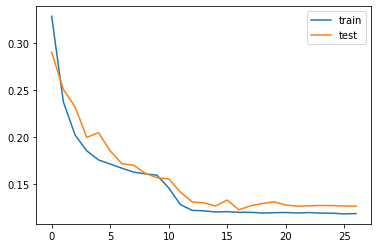

In [39]:
import mlflow
from keras.models import Sequential
from keras.layers import InputLayer, Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
import keras.utils

mlflow.set_experiment("LSTM_all_stations")
mlflow.start_run()
mlflow.tensorflow.autolog()

# Define a seed for reproducibility
keras.utils.set_random_seed(42)

# LSTM model to predict air quality data for a 14 day lookback window and 1 day forecast using the train and test data.
model = Sequential()
model.add(InputLayer(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(units=5, activation='relu', return_sequences=False)) # We avoid using activation='relu' because it disregards the negative values and this may result in information loss.
model.add(Dropout(0.2))
# model.add(LSTM(units=5, activation='relu', return_sequences=False)) # return_sequences=False for single output prediction (i.e. 1 day forecast)
# model.add(Dropout(0.2))
model.add(Dense(units=train_Y.shape[2]))
model.compile(loss='mae', optimizer='adam')

# Train the model with early stopping.
history = model.fit(train_X, train_Y, epochs=500, batch_size=32, validation_data=(test_X, test_Y), verbose=2, shuffle=False, callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001, restore_best_weights=True)])

# Plot the model's predictions
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.savefig("LSTM_loss.png")

# log and fetch the artifact
mlflow.log_artifact("LSTM_loss.png")

mlflow.end_run()

plt.show()
plt.close()

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5)                 1080      
                                                                 
 dropout_4 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
Total params: 1,110
Trainable params: 1,110
Non-trainable params: 0
_________________________________________________________________


In [41]:
import datetime
# Save model with current date and time as a unique identifier, with best weights
model.save('LSTM_all_stations_' + str(datetime.datetime.now()).replace(' ', '_').replace(':', '-').replace('.', '_') + '.h5')

In [42]:
scaler.feature_names_in_

array(['SO_2', 'CO', 'NO', 'NO_2', 'PM25', 'PM10', 'NOx', 'O_3', 'TOL',
       'BEN', 'EBE', 'TCH', 'CH4', 'NMHC', 'average_temperature',
       'rainfall', 'minimum_temperature', 'maximum_temperature',
       'wind_direction', 'average_wind_speed', 'maximum_wind_speed',
       'maximum_ultraviolet_index', 'maximum_pressure',
       'minimum_pressure'], dtype=object)

In [94]:
# Predict air quality for the test data and inverse transform the data
predictions = model.predict(test_X)

print(predictions.shape)

# Turn the predictions into dataframe with the column names
# predictions = pd.DataFrame(predictions, columns=['PM25', 'PM10', 'NO_2', 'SO_2', 'O_3'])
print(predictions)

1079/1079 [==============================] - 7s 6ms/step
(34519, 5)
[[-1.0001593  -0.9295666   0.18113992 -0.06024282 -0.9297332 ]
 [-1.0001593  -0.9295666   0.18113992 -0.06024282 -0.9297332 ]
 [-1.0001593  -0.9295666   0.18113992 -0.06024282 -0.9297332 ]
 ...
 [-1.0001087  -0.15109146  0.15067264 -0.8084348  -0.00643808]
 [-1.0001112  -0.14960921  0.15090527 -0.808016   -0.02014816]
 [-1.0001112  -0.15690422  0.15120551 -0.8054928  -0.02834415]]


In [100]:
# Turn the predictions into dataframe with the column names
predictions = pd.DataFrame(predictions, columns=['PM25', 'PM10', 'NO_2', 'SO_2', 'O_3'])

# Create a dummy DataFrame with scaler.feature_names_in_ as the column names in order to inverse transform the data
inverse_transform = pd.DataFrame(columns=scaler.feature_names_in_)

# Join the predictions and inverse_transform dataframes on 'PM25', 'PM10', 'NO_2', 'SO_2', 'O_3'
inverse_transform['PM25'] = predictions['PM25']
inverse_transform['PM10'] = predictions['PM10']
inverse_transform['NO_2'] = predictions['NO_2']
inverse_transform['SO_2'] = predictions['SO_2']
inverse_transform['O_3'] = predictions['O_3']

inverse_transform = scaler.inverse_transform(inverse_transform)
inverse_transform = inverse_transform.round(2)

# Turn the inverse_transform into a dataframe with the column names
inverse_transform = pd.DataFrame(inverse_transform, columns=scaler.feature_names_in_)

# Drop all columns except PM25, PM10, NO_2, SO_2, O_3
predictions_df = inverse_transform[['PM25', 'PM10', 'NO_2', 'SO_2', 'O_3']]

predictions_df

,PM25,PM10,NO_2,SO_2,O_3
0,-124.020000,-165.250000,34.330000,-4.480000,-135.670000
1,-124.020000,-165.250000,34.330000,-4.480000,-135.670000
2,-124.020000,-165.250000,34.330000,-4.480000,-135.670000
3,-124.020000,-165.250000,34.330000,-4.480000,-135.670000
4,-124.020000,-165.250000,34.330000,-4.480000,-135.670000
...,...,...,...,...,...
34514,-124.010000,-23.350000,28.660000,-72.760000,1.780000
34515,-124.010000,-21.800000,28.640000,-72.530000,1.170000
34516,-124.010000,-24.350000,28.720000,-72.570000,0.050000
34517,-124.010000,-24.080000,28.770000,-72.530000,-1.960000


In [101]:
# Reduce the dimension of the test_Y numpy array
test_Y_df = test_Y.reshape(test_Y.shape[0], test_Y.shape[2])

# Turn the test into dataframe with the column names
test_Y_df = pd.DataFrame(test_Y_df, columns=['PM25', 'PM10', 'NO_2', 'SO_2', 'O_3'])

# Create a dummy DataFrame with scaler.feature_names_in_ as the column names in order to inverse transform the data
inverse_transform_test = pd.DataFrame(columns=scaler.feature_names_in_)

# Join the test and inverse_transform dataframes on 'PM25', 'PM10', 'NO_2', 'SO_2', 'O_3'
inverse_transform_test['PM25'] = test_Y_df['PM25']
inverse_transform_test['PM10'] = test_Y_df['PM10']
inverse_transform_test['NO_2'] = test_Y_df['NO_2']
inverse_transform_test['SO_2'] = test_Y_df['SO_2']
inverse_transform_test['O_3'] = test_Y_df['O_3']

inverse_transform_test = scaler.inverse_transform(inverse_transform_test)

# Turn the inverse_transform into a dataframe with the column names
inverse_transform_test = pd.DataFrame(inverse_transform_test, columns=scaler.feature_names_in_)

# Drop all columns except PM25, PM10, NO_2, SO_2, O_3
test_Y_df = inverse_transform_test[['PM25', 'PM10', 'NO_2', 'SO_2', 'O_3']]

test_Y_df

,PM25,PM10,NO_2,SO_2,O_3
0,-124.000000,-178.000000,40.000000,8.000000,-146.000000
1,-124.000000,-178.000000,51.000000,9.000000,-146.000000
2,-124.000000,-178.000000,52.000000,9.000000,-146.000000
3,-124.000000,-178.000000,41.000000,8.000000,-146.000000
4,-124.000000,-178.000000,66.000000,11.000000,-146.000000
...,...,...,...,...,...
34514,-124.000000,15.000000,55.000000,-90.000000,10.000000
34515,-124.000000,12.000000,63.000000,-90.000000,17.000000
34516,-124.000000,14.000000,76.000000,-90.000000,13.000000
34517,-124.000000,15.000000,69.000000,-90.000000,14.000000


Mean absolute error:
 PM25    4.446759
PM10   27.782644
NO_2   16.170239
SO_2   11.834197
O_3    27.832669
dtype: float64


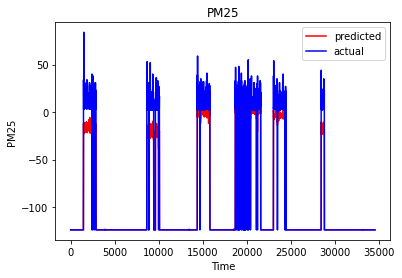

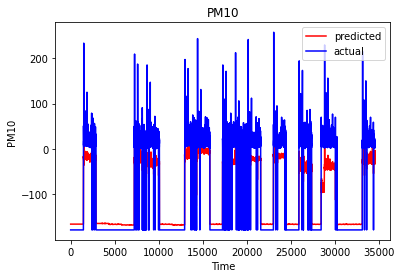

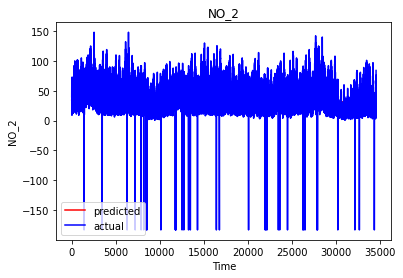

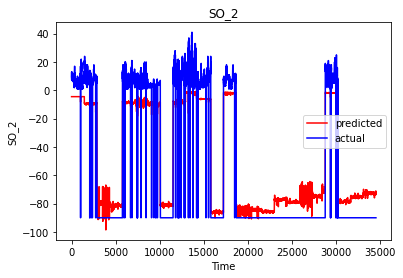

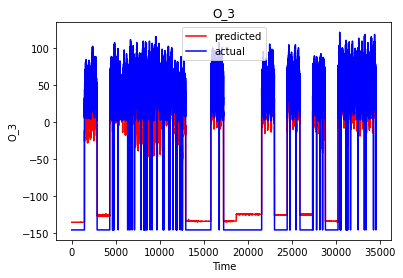

In [111]:
# Calculate the mean absolute error
mae = np.mean(np.abs(predictions_df - test_Y_df))

print("Mean absolute error:\n", mae)

# Plot the predicted and actual air quality data for the test data for each contaminant.
# The predicted data is in red, the actual data is in blue.
for column in predictions_df.columns:
    plt.plot(predictions_df[column], color='red', label='predicted')
    plt.plot(test_Y_df[column], color='blue', label='actual')
    plt.title(column)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.show()
    plt.close()

In [38]:
mlflow.end_run()